# World Happiness Score Prediction


In [403]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [404]:
happ_ds=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")

This dataset has 158 rows and 12 columns

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

In [405]:
happ_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [406]:
happ_ds.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [407]:
happ_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country and Region are categorical data. Remaining columns are numerical data

In [408]:
happ_ds.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [409]:
happ_ds.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:
    
1.The mean is greater than median in Family ,Trust columns and hence right skewness present.
2.Also outliers present in the corruption column as there is a difference between 75% and max value

In [410]:
happ_ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values in the dataset

Unique count in each column

In [411]:
for i in happ_ds.columns:
    print(happ_ds[i].value_counts())
    print('\n')

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

## EDA Analysis:

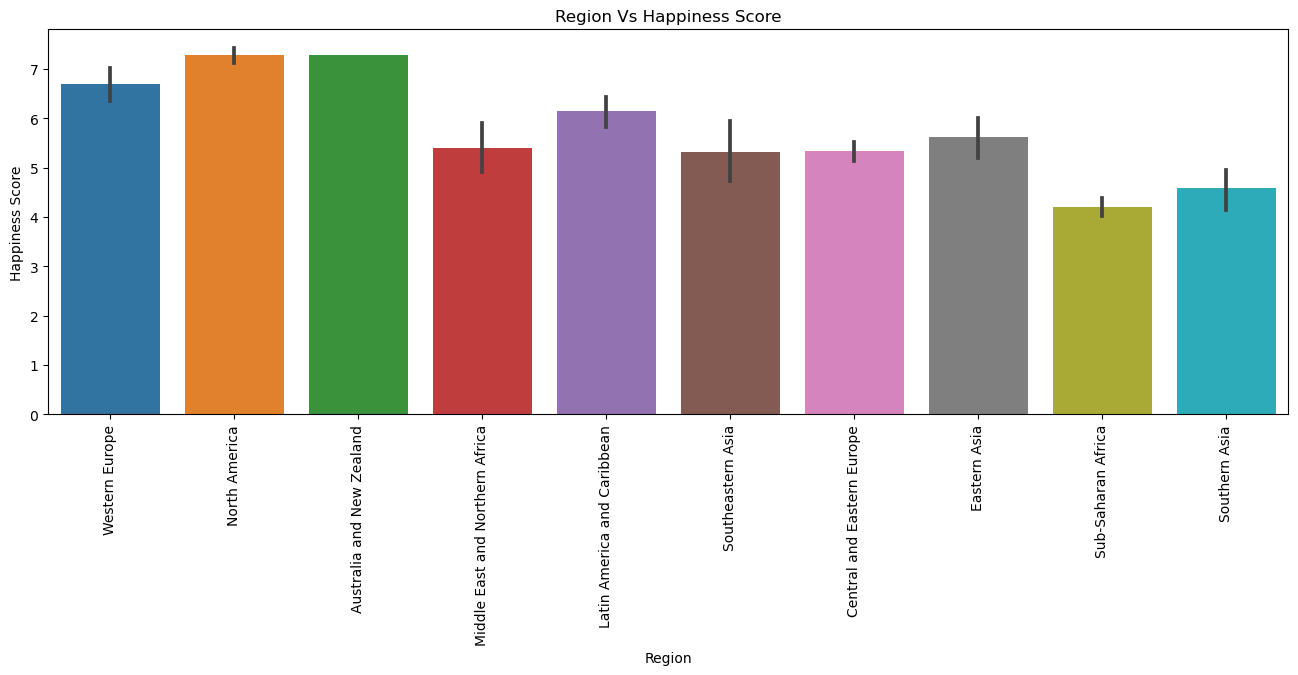

In [412]:
plt.figure(figsize=(16,5))
sns.barplot(x='Region', y='Happiness Score',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Region Vs Happiness Score')
plt.show()

North America,Australia and Newzealand Regions has the highest happiness score when compared to other regions

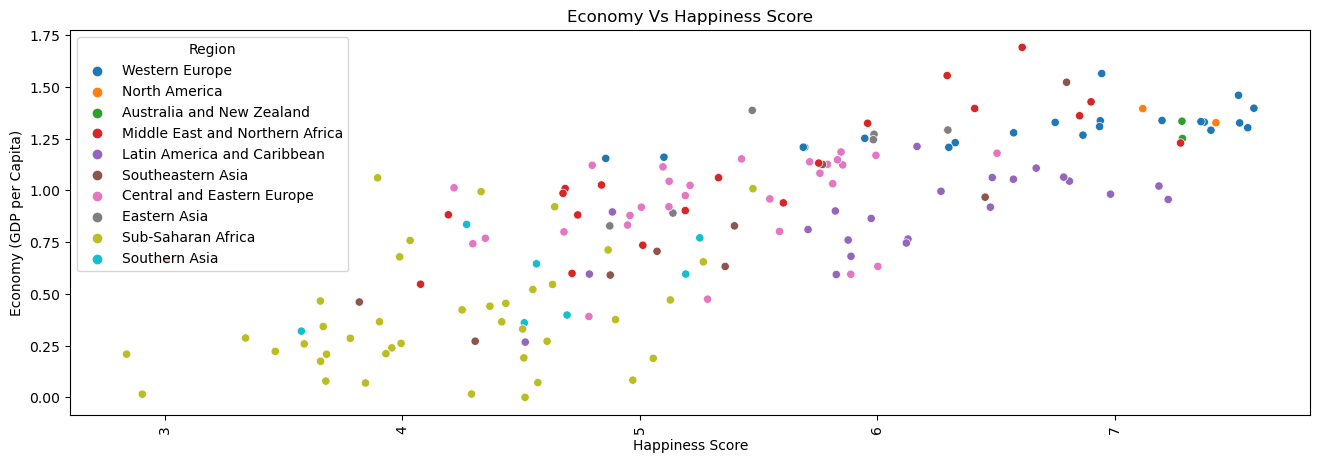

In [413]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Happiness Score', y='Economy (GDP per Capita)',hue=happ_ds['Region'],data=happ_ds)
plt.xticks(rotation=90)
plt.title('Economy Vs Happiness Score')
plt.show()

As the economy increases, the happiness score also increases

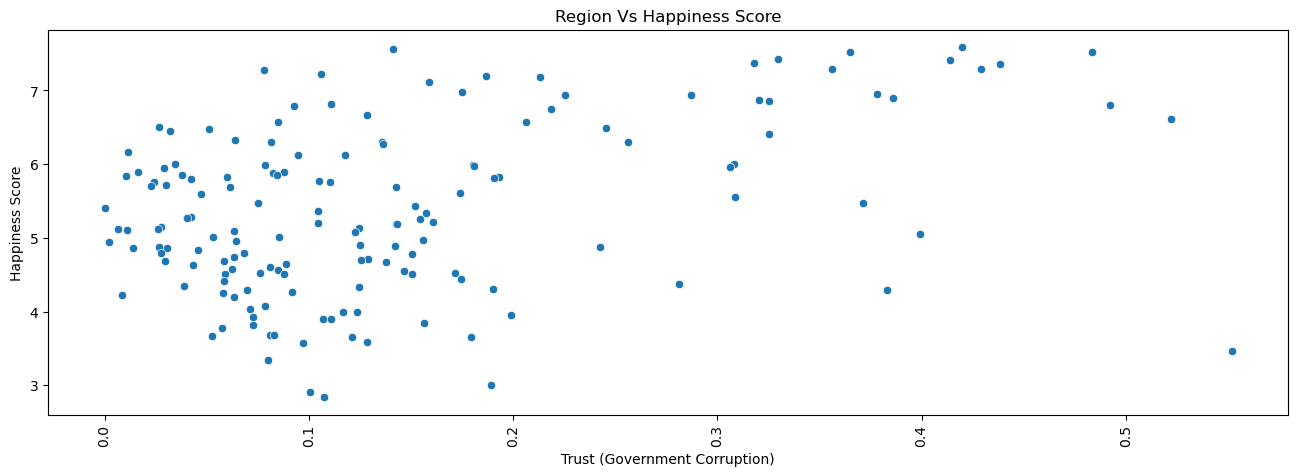

In [414]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Trust (Government Corruption)', y='Happiness Score',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Region Vs Happiness Score')
plt.show()

When there is a less corruption , the happiness score is high. When there is more corruption, the happiness score is not high.

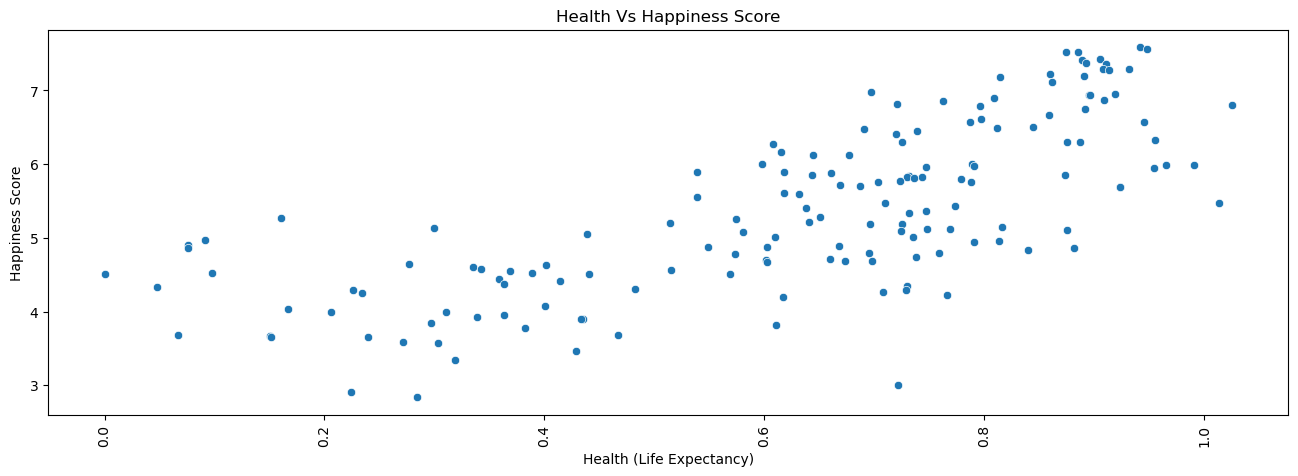

In [415]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Health (Life Expectancy)', y='Happiness Score',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Health Vs Happiness Score')
plt.show()

As the life expectancy increases the happiness score also increases

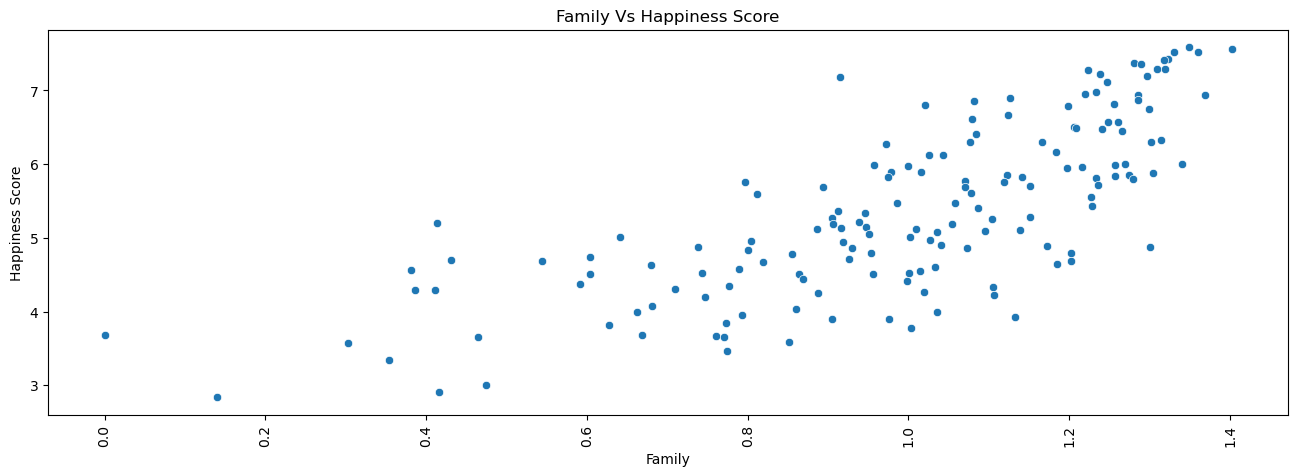

In [416]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Family', y='Happiness Score',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Family Vs Happiness Score')
plt.show()

As the family support increases, the happiness score also increases.

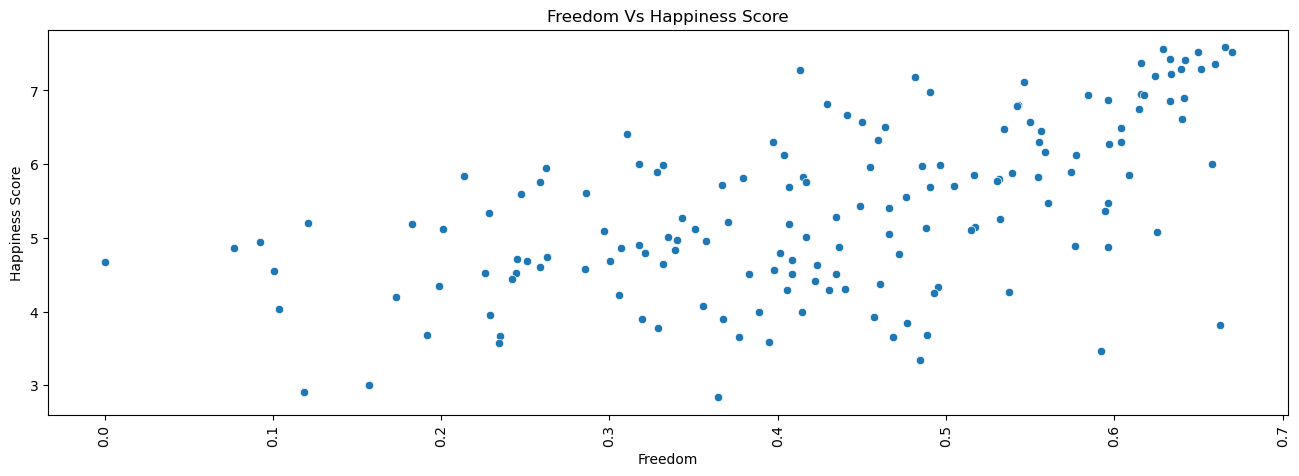

In [417]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Freedom', y='Happiness Score',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Freedom Vs Happiness Score')
plt.show()

When there is more freedom, the happiness is high

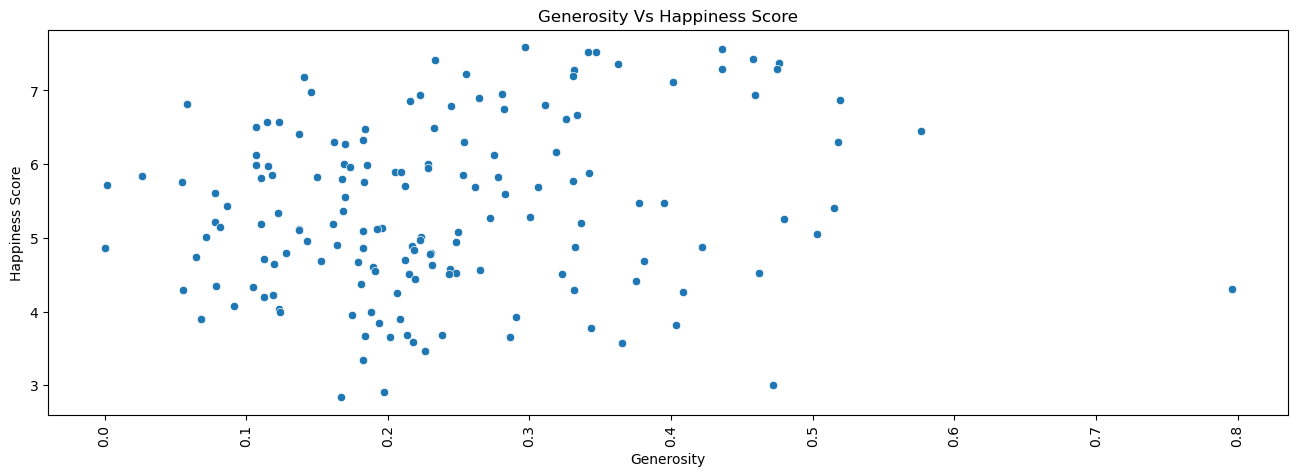

In [418]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Generosity', y='Happiness Score',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Generosity Vs Happiness Score')
plt.show()

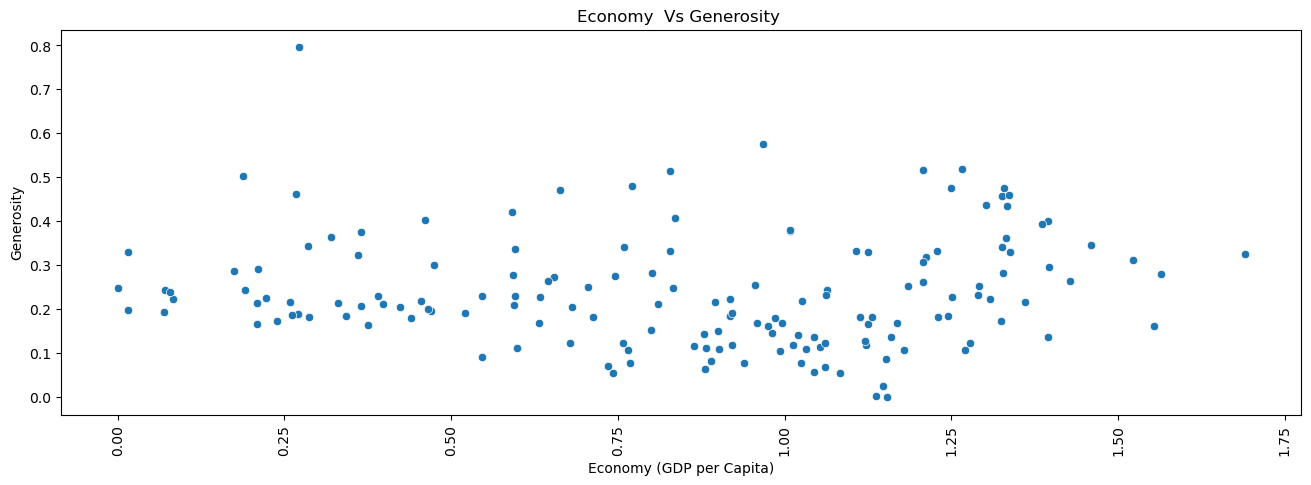

In [419]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='Economy (GDP per Capita)', y='Generosity',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Economy  Vs Generosity ')
plt.show()

When the economy increases, the generosity also increases. 

In [420]:
GDP_Perc=happ_ds.groupby('Region')['Economy (GDP per Capita)'].sum()
GDP_Perc

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

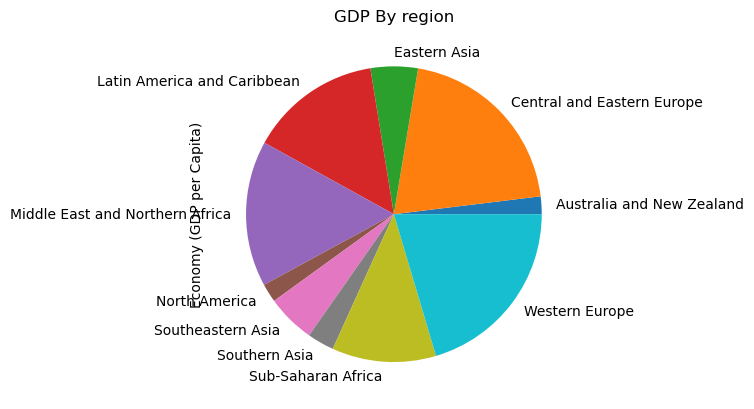

In [421]:
GDP_Perc.plot.pie()
plt.title('GDP By region')
plt.show()

Central Eastern and western Europe has highest economy when compared to other regions.

In [422]:
corruption=happ_ds.groupby('Region')['Trust (Government Corruption)'].mean()
corruption

Region
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463
Name: Trust (Government Corruption), dtype: float64

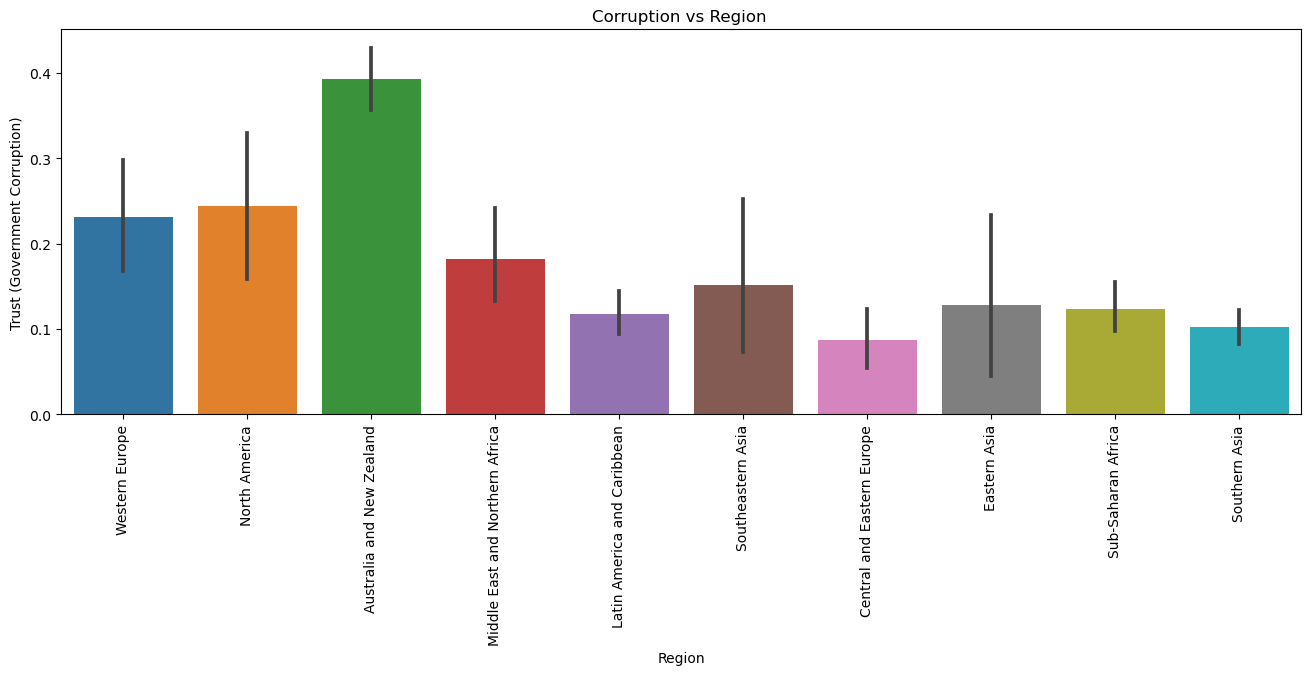

In [423]:
plt.figure(figsize=(16,5))
sns.barplot(x='Region', y='Trust (Government Corruption)',data=happ_ds)
plt.xticks(rotation=90)
plt.title('Corruption vs Region ')
plt.show()

Corruption is high in Australia and Newzealand and then North America ,western Europe

In [424]:
Reg_happ=happ_ds.groupby('Region')['Happiness Score'].mean()
Reg_happ

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

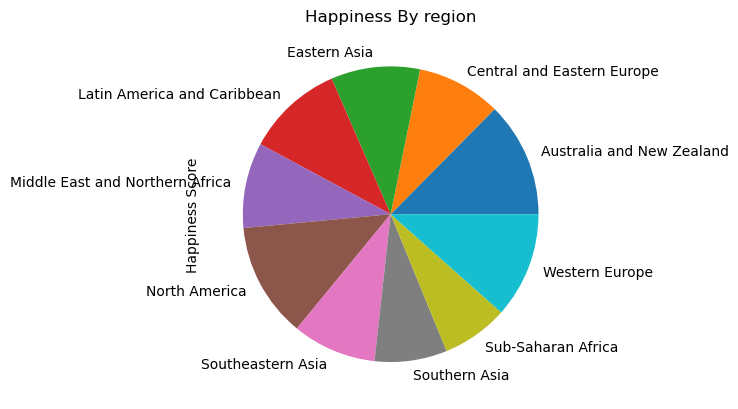

In [425]:
Reg_happ.plot.pie()
plt.title('Happiness By region')
plt.show()

### Distribution Of Data

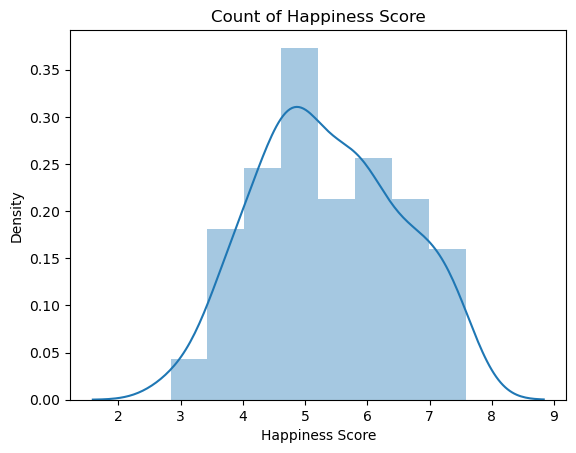

In [426]:
sns.distplot(happ_ds['Happiness Score'])
plt.title('Count of Happiness Score')
plt.show()

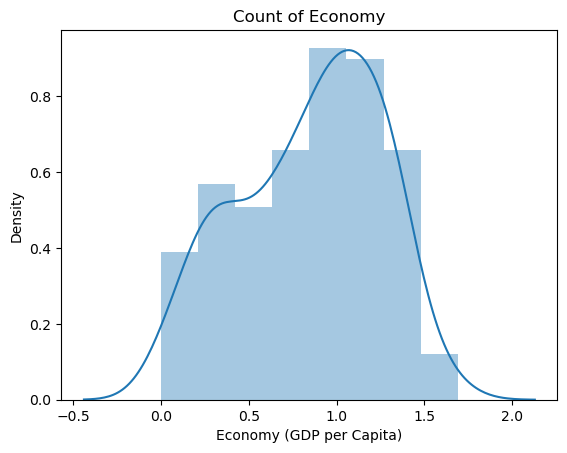

In [427]:
sns.distplot(happ_ds['Economy (GDP per Capita)'])
plt.title('Count of Economy')
plt.show()

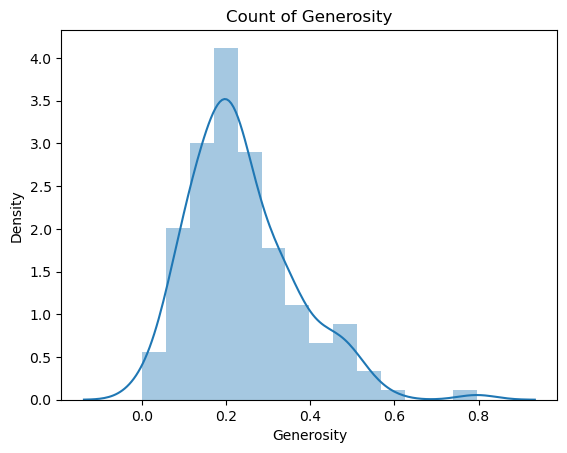

In [428]:
sns.distplot(happ_ds['Generosity'])
plt.title('Count of Generosity')
plt.show()

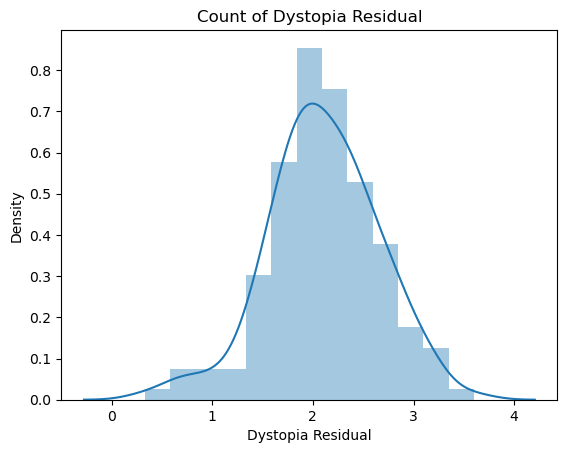

In [429]:
sns.distplot(happ_ds['Dystopia Residual'])
plt.title('Count of Dystopia Residual')
plt.show()

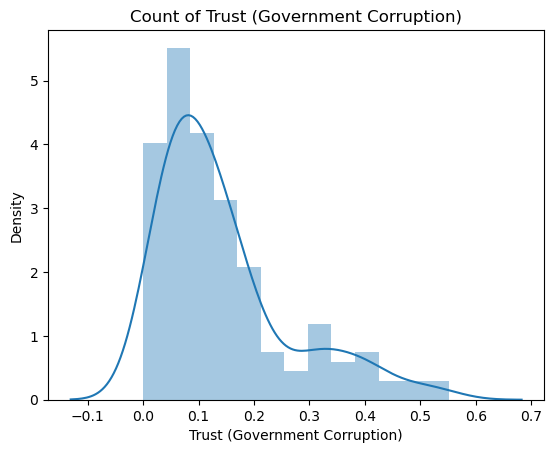

In [430]:
sns.distplot(happ_ds['Trust (Government Corruption)'])
plt.title('Count of Trust (Government Corruption)')
plt.show()

Outliers are present in the corruption column

In [431]:

features = [ 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)','Dystopia Residual', 'Standard Error','Happiness Score']

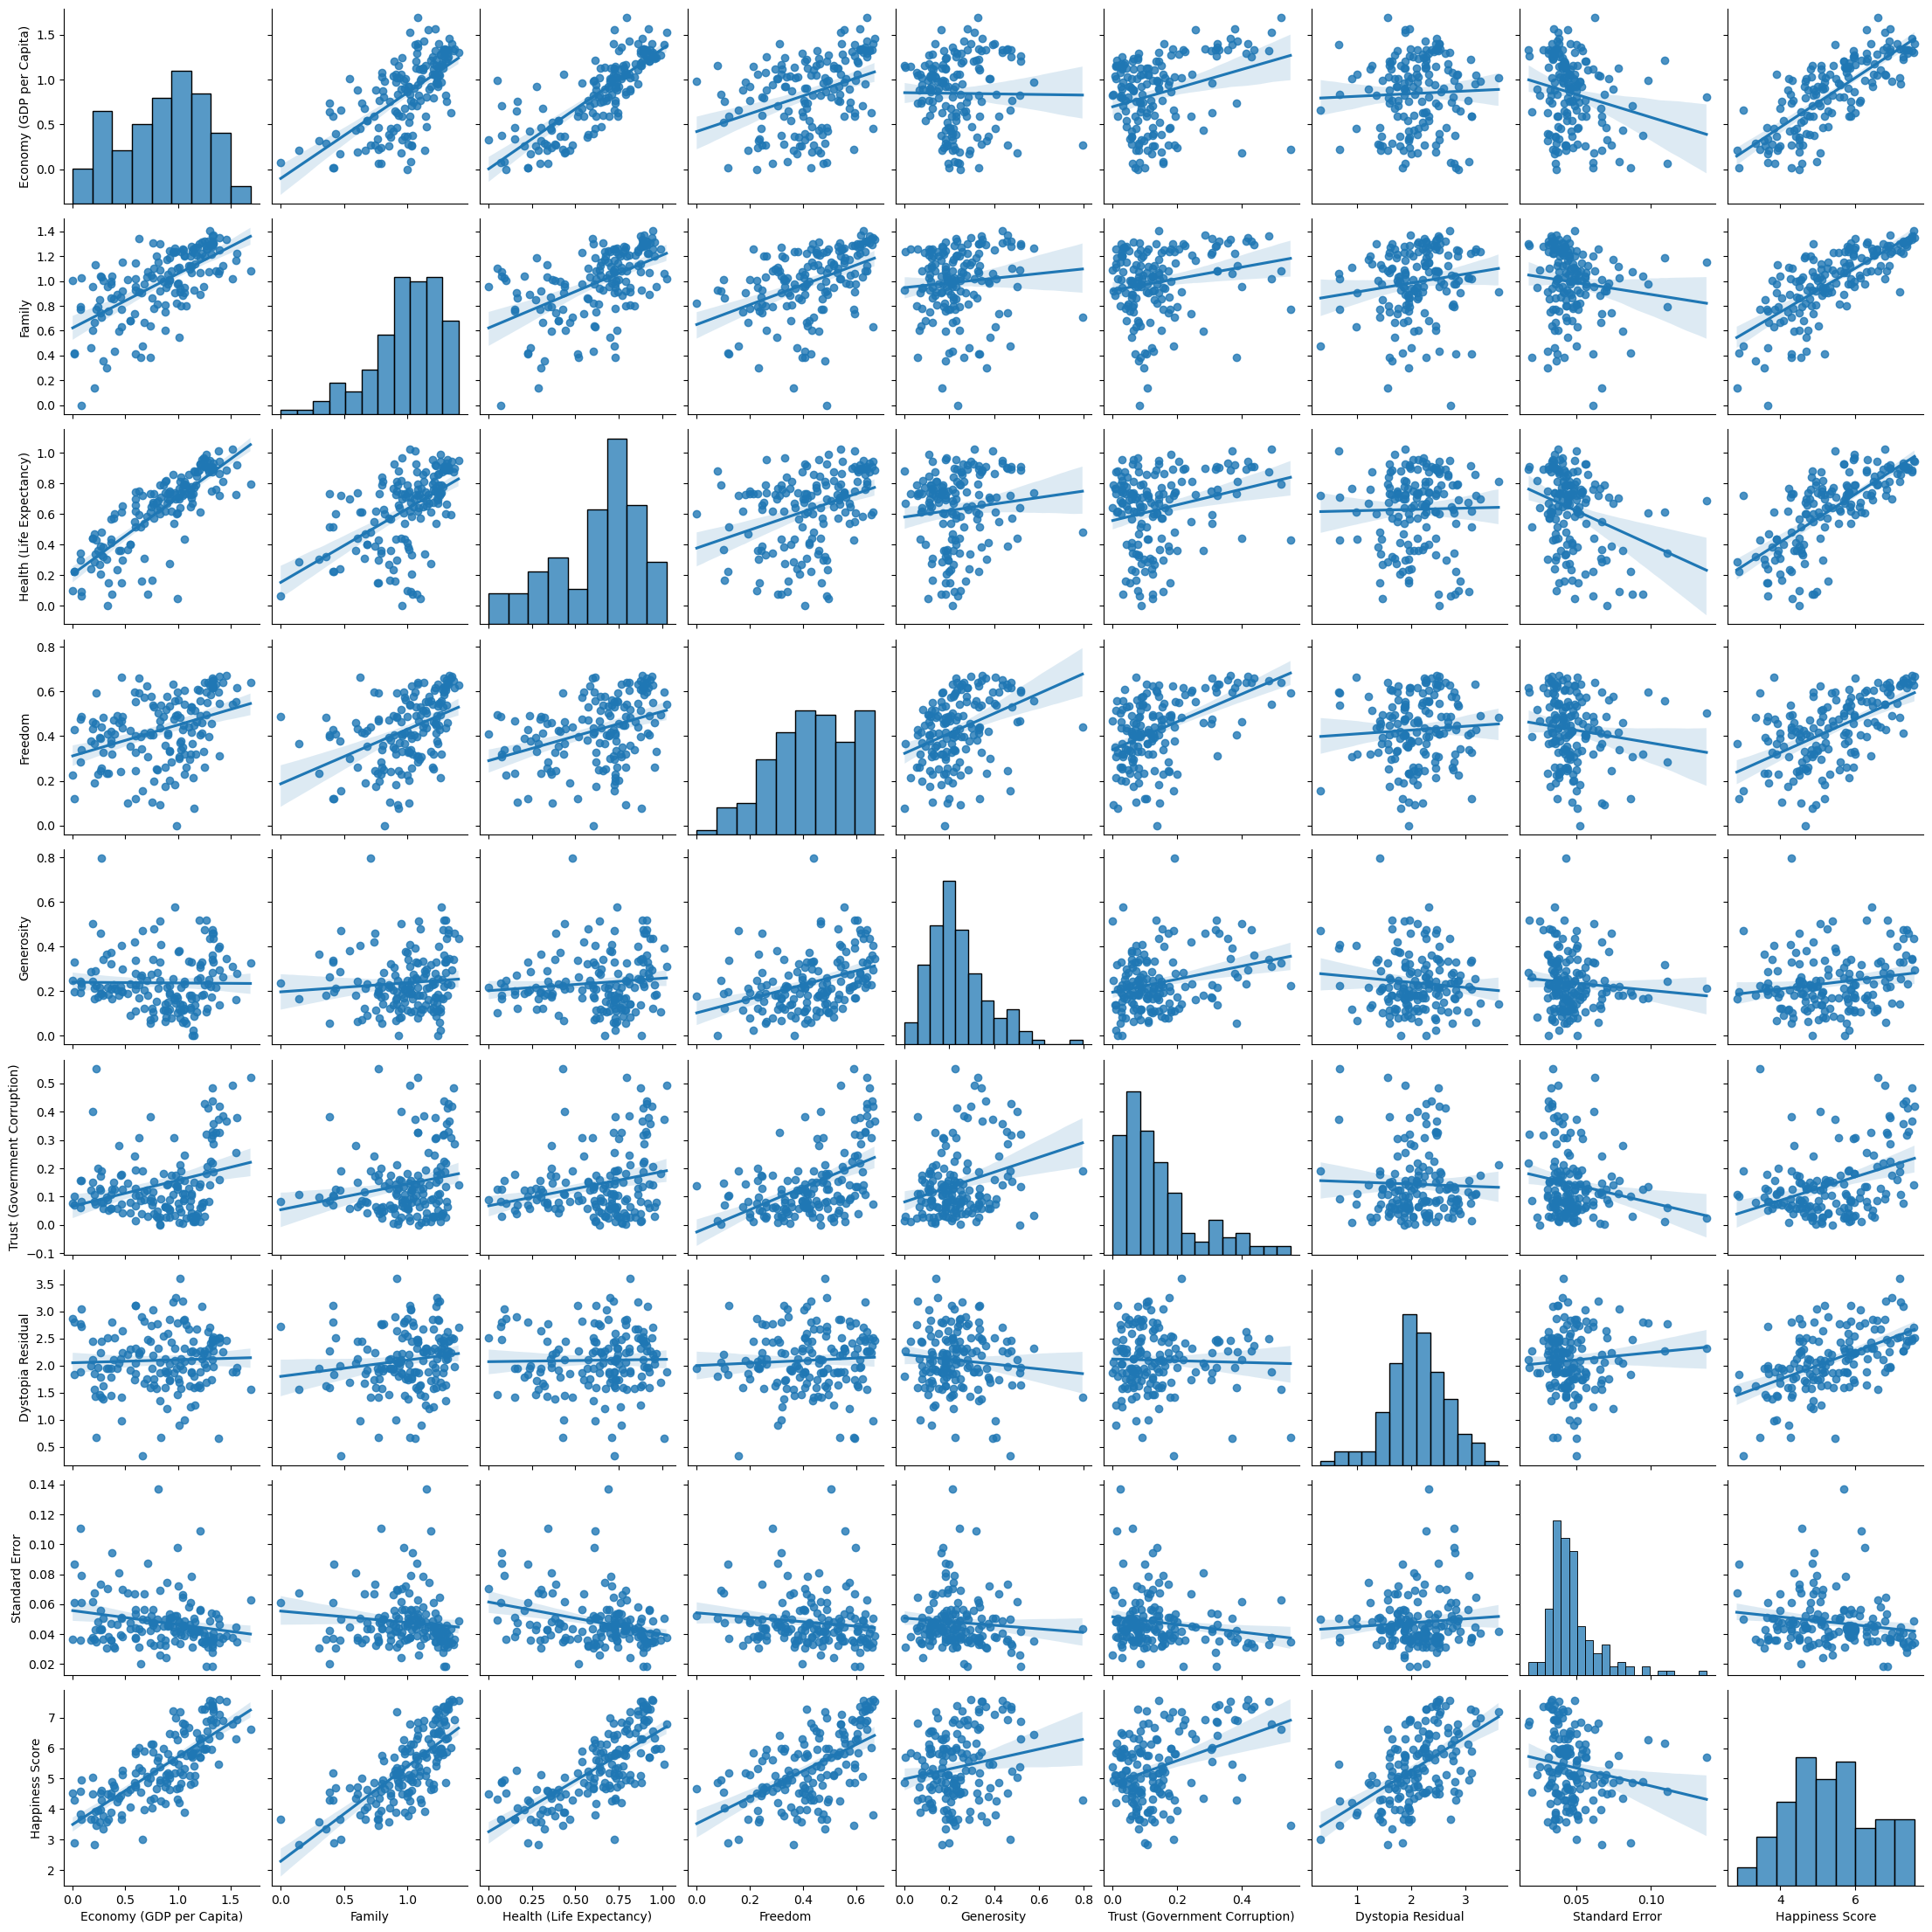

In [432]:
sns.pairplot(happ_ds[features], kind='reg')

Economy (GDP per Capita)            Axes(0.125,0.53;0.110714x0.35)
Family                           Axes(0.257857,0.53;0.110714x0.35)
Health (Life Expectancy)         Axes(0.390714,0.53;0.110714x0.35)
Freedom                          Axes(0.523571,0.53;0.110714x0.35)
Generosity                       Axes(0.656429,0.53;0.110714x0.35)
Trust (Government Corruption)    Axes(0.789286,0.53;0.110714x0.35)
Dystopia Residual                   Axes(0.125,0.11;0.110714x0.35)
Standard Error                   Axes(0.257857,0.11;0.110714x0.35)
Happiness Score                  Axes(0.390714,0.11;0.110714x0.35)
dtype: object

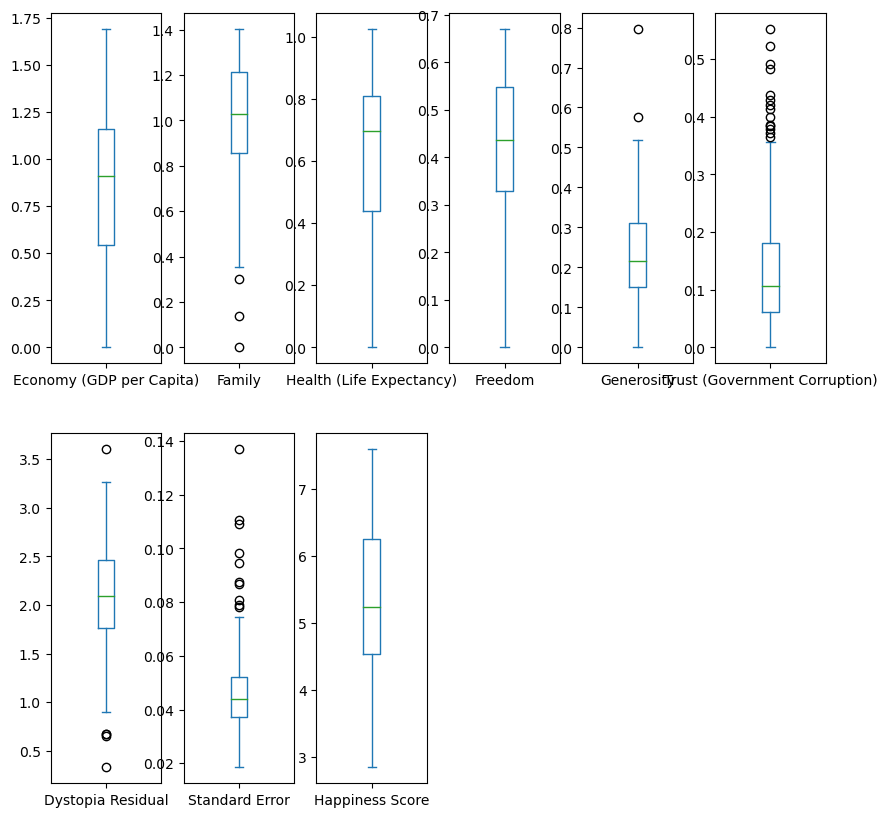

In [433]:
happ_ds[features].plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

Outliers are present in the Corruption as there is huge difference between 75% and maximum value

<Axes: >

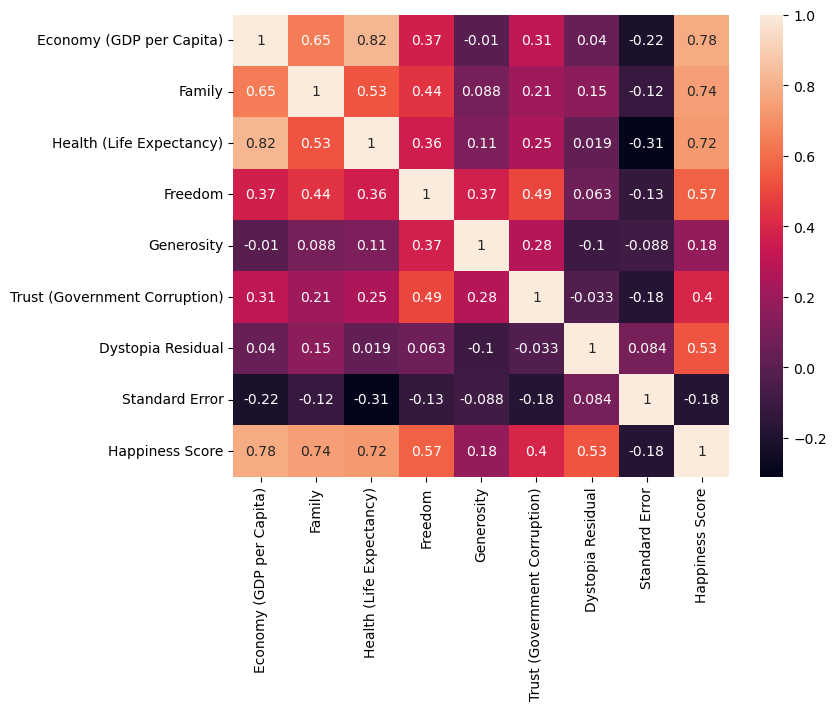

In [434]:
plt.figure(figsize=(8,6))
sns.heatmap(happ_ds[features].corr(), annot=True)

Observations:
    1. There is a strong correlation between Economy and health, Economy and Happiness score, Economy and Family
    2. Family, GDP per capita, Healthy life expectancy have high correlation with Happiness Score
    3. Dystopia residual - has almost no existence relationship with all other features except happiness score

In [435]:
happ_ds[features].skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Dystopia Residual               -0.238911
Standard Error                   1.983439
Happiness Score                  0.097769
dtype: float64

In [436]:
happ_ds1=happ_ds[features]
happ_ds1

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Standard Error,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,0.03411,7.587
1,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,0.04884,7.561
2,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,0.03328,7.527
3,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,0.03880,7.522
4,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,0.03553,7.427
...,...,...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,0.67042,0.03464,3.465
154,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328,0.03656,3.340
155,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,0.32858,0.05015,3.006
156,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,1.83302,0.08658,2.905


### Removing Outliers

In [437]:
from scipy.stats import zscore
z=np.abs(zscore(happ_ds1))
threshold=3
np.where(z>3)
happ_ds1=happ_ds1[(z<3).all(axis=1)]
happ_ds1

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Standard Error,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,0.03411,7.587
1,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,0.04884,7.561
2,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,0.03328,7.527
3,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,0.03880,7.522
4,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,0.03553,7.427
...,...,...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.20165,0.17922,1.41723,0.05141,3.655
151,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832,1.46494,0.04324,3.587
152,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,1.95210,0.03084,3.575
154,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328,0.03656,3.340


## Data Splitting

In [438]:
x=happ_ds1.iloc[:,0:-1]
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Standard Error
0,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,0.03411
1,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,0.04884
2,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,0.03328
3,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,0.03880
4,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,0.03553
...,...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.20165,0.17922,1.41723,0.05141
151,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832,1.46494,0.04324
152,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,1.95210,0.03084
154,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328,0.03656


In [439]:
y=happ_ds1.iloc[:,-1]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [469]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

In [470]:
x_train.shape

(119, 8)

In [471]:
x_test.shape

(30, 8)

In [472]:
y_train.shape

(119,)

In [473]:
y_test.shape

(30,)

In [474]:
lr=LinearRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, prediction))
print('Mean Square Error:',np.sqrt(mean_squared_error(y_test, prediction)))
r2_score_linear = r2_score(y_test, prediction)

print('R2 Score:',r2_score(y_test, prediction))

Mean Square Error: 0.00031740490985253416
R2 Score: 0.999999917346023


In [461]:
pred=lr_model.predict(x_test)
print("Predicted Value:",pred)
print("Actual Value:",y_test)

Predicted Value: [[ 1.20806000e+00  1.07008000e+00  9.23560000e-01  4.90270000e-01
   2.61690000e-01  1.42800000e-01  1.59888000e+00  5.63500000e-02]
 [ 8.30800000e-02  1.02626000e+00  9.13100000e-02  3.40370000e-01
   2.22690000e-01  1.56030000e-01  3.05137000e+00  7.89600000e-02]
 [ 5.95320000e-01  9.53480000e-01  6.95100000e-01  4.01480000e-01
   2.30270000e-01  6.82500000e-02  1.84408000e+00  5.64800000e-02]
 [ 1.55422000e+00  1.16594000e+00  7.24920000e-01  5.54990000e-01
   1.62280000e-01  2.56090000e-01  1.87634000e+00  4.45600000e-02]
 [ 9.00190000e-01  9.74590000e-01  7.30170000e-01  4.14960000e-01
   1.49820000e-01  5.98900000e-02  2.59450000e+00  4.61500000e-02]
 [ 9.95340000e-01  9.72000000e-01  6.08200000e-01  5.96570000e-01
   1.69910000e-01  1.36330000e-01  2.79094000e+00  9.81100000e-02]
 [ 1.03192000e+00  1.23289000e+00  7.36080000e-01  3.79380000e-01
   1.10460000e-01  1.90900000e-01  2.13090000e+00  3.93800000e-02]
 [ 6.94000000e-02  7.72650000e-01  2.97070000e-01  4

In [462]:
input_data = (1.34,1.56,0.765,0.66,0.56,0.34,2.25,0.03) #Economy,Family,Health,Freedom,Generosity,Trust,Dystopia,Std error
array_data = np.asarray(input_data)
array_data_reshaped = array_data.reshape(1,-1)
pred= lr.predict(array_data_reshaped)
print('The happiness score is :',pred)


The happiness score is : [7.47489573]


In [463]:

rd = Ridge(alpha=0.0001)
rd.fit(x,y)
print(rd.coef_)
print('Score:',rd.score(x,y))

[ 1.00008579e+00  9.99982207e-01  9.99909268e-01  9.99568728e-01
  1.00008225e+00  9.99982044e-01  1.00002091e+00 -2.95151951e-04]
Score: 0.9999999376461325


In [464]:
ls = Lasso(alpha=0.00001)
ls.fit(x,y)
print(ls.coef_)
print('Score:',ls.score(x,y))

[ 1.00036983  0.99989941  0.99955414  0.99954913  0.9997431   0.9993067
  0.99999984 -0.        ]
Score: 0.9999999255723372


In [465]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.99999943 0.99999847 0.99999831 0.99999509 0.99999933]
0.9999981234686345
1.5837827108856898e-06


In [466]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.99999945 0.99999849 0.99999832 0.99999505 0.99999933]
0.9999981264682754
1.6029795063522015e-06


In [467]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ls,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.99999731 0.99999862 0.99999825 0.99999422 0.99999899]
0.9999974768725733
1.7215176533711075e-06


## The LinearRegresssion, Lasso and Ridge all the models works best with R2 score as 0.99999.....

## Saving Best Model

In [468]:
import joblib
joblib.dump(lr,'lrfile.obj')#Serialization
dtc_from_joblib=joblib.load('lrfile.obj')
dtc_from_joblib.predict(x_test)

array([5.69529626, 4.97102426, 4.78792424, 6.29477951, 5.82408204,
       6.26914038, 5.81252846, 3.84501969, 6.48507902, 5.97521075,
       5.19230961, 4.79958488, 7.22559878, 5.19379407, 4.89744888,
       6.98249974, 7.19975775, 4.03305215, 5.36025892, 3.89655995,
       7.56076831, 5.47697943, 4.36916958, 4.94873162, 6.94019636,
       4.8576199 , 7.52700689, 7.27762415, 4.88447524, 6.90134333])